In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c har-competition-onsite
!unzip -q /content/har-competition-onsite.zip

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          13686        284  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          10333        213  1.0              
kapturovalexander/online-shop-2023                                  🏪🏬🛍️🛒 Online shop 2023                                3KB  2024-07-10 15:36:20            805         23  1.0              
ihelon/coffee-sales                     

In [2]:
import os
from glob import glob
from natsort import os_sorted
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from time import time

In [3]:
input_dir = "/content/HAR"
train_dir = input_dir + "/train"
test_dir  = input_dir + "/test"
df_paths  = glob(os.path.join(train_dir,"*","*.csv"))
df_paths

['/content/HAR/train/C04/S4.csv',
 '/content/HAR/train/C04/S3.csv',
 '/content/HAR/train/C04/S2.csv',
 '/content/HAR/train/C04/S1.csv',
 '/content/HAR/train/C07/S3.csv',
 '/content/HAR/train/C07/S2.csv',
 '/content/HAR/train/C07/S1.csv',
 '/content/HAR/train/C01/S4.csv',
 '/content/HAR/train/C01/S3.csv',
 '/content/HAR/train/C01/S2.csv',
 '/content/HAR/train/C01/S1.csv',
 '/content/HAR/train/C01/S5.csv',
 '/content/HAR/train/C06/S4.csv',
 '/content/HAR/train/C06/S3.csv',
 '/content/HAR/train/C06/S2.csv',
 '/content/HAR/train/C06/S1.csv',
 '/content/HAR/train/C06/S5.csv',
 '/content/HAR/train/C05/S4.csv',
 '/content/HAR/train/C05/S3.csv',
 '/content/HAR/train/C05/S2.csv',
 '/content/HAR/train/C05/S1.csv',
 '/content/HAR/train/C09/S4.csv',
 '/content/HAR/train/C09/S3.csv',
 '/content/HAR/train/C09/S2.csv',
 '/content/HAR/train/C09/S1.csv',
 '/content/HAR/train/C02/S4.csv',
 '/content/HAR/train/C02/S3.csv',
 '/content/HAR/train/C02/S2.csv',
 '/content/HAR/train/C02/S1.csv',
 '/content/HAR

In [4]:
concatdf = []
for activity_dir in os.listdir(train_dir):
    if activity_dir[0] == '.':
        continue
    print(activity_dir)
    for csv_file in os.listdir(os.path.join(train_dir,activity_dir)):
        print(os.path.join(train_dir, activity_dir, csv_file))
        df = pd.read_csv(os.path.join(train_dir, activity_dir, csv_file))
        df['label'] = activity_dir
        print(csv_file,df.shape[0],"->",200*(df.shape[0]//200))
        concatdf.append(df[:200*(df.shape[0]//200)])
        # break
    # break
frame = pd.concat(concatdf)

C04
/content/HAR/train/C04/S4.csv
S4.csv 26400 -> 26400
/content/HAR/train/C04/S3.csv
S3.csv 25100 -> 25000
/content/HAR/train/C04/S2.csv
S2.csv 19200 -> 19200
/content/HAR/train/C04/S1.csv
S1.csv 24400 -> 24400
C07
/content/HAR/train/C07/S3.csv
S3.csv 24600 -> 24600
/content/HAR/train/C07/S2.csv
S2.csv 24500 -> 24400
/content/HAR/train/C07/S1.csv
S1.csv 21100 -> 21000
C01
/content/HAR/train/C01/S4.csv
S4.csv 16100 -> 16000
/content/HAR/train/C01/S3.csv
S3.csv 12100 -> 12000
/content/HAR/train/C01/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C01/S1.csv
S1.csv 27300 -> 27200
/content/HAR/train/C01/S5.csv
S5.csv 13300 -> 13200
C06
/content/HAR/train/C06/S4.csv
S4.csv 12200 -> 12200
/content/HAR/train/C06/S3.csv
S3.csv 12300 -> 12200
/content/HAR/train/C06/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C06/S1.csv
S1.csv 23200 -> 23200
/content/HAR/train/C06/S5.csv
S5.csv 13400 -> 13400
C05
/content/HAR/train/C05/S4.csv
S4.csv 18532 -> 18400
/content/HAR/train/C05/S3.csv
S3.csv 9400 ->

In [5]:
input_dir = "/content/HAR"
train_dir = input_dir + "/train"
test_dir  = input_dir + "/test"
df_paths  = glob(os.path.join(train_dir,'*','*.csv'))

In [6]:
concatdf = []
for activity_dir in os.listdir(train_dir):
    print(activity_dir)
    for csv_file in os.listdir(os.path.join(train_dir,activity_dir)):
        print(os.path.join(train_dir, activity_dir, csv_file))
        df = pd.read_csv(os.path.join(train_dir, activity_dir, csv_file))
        df['label'] = activity_dir
        print(csv_file,df.shape[0],"->",500*(df.shape[0]//500))
        concatdf.append(df[:500*(df.shape[0]//500)])
frame = pd.concat(concatdf)

C04
/content/HAR/train/C04/S4.csv
S4.csv 26400 -> 26000
/content/HAR/train/C04/S3.csv
S3.csv 25100 -> 25000
/content/HAR/train/C04/S2.csv
S2.csv 19200 -> 19000
/content/HAR/train/C04/S1.csv
S1.csv 24400 -> 24000
C07
/content/HAR/train/C07/S3.csv
S3.csv 24600 -> 24500
/content/HAR/train/C07/S2.csv
S2.csv 24500 -> 24500
/content/HAR/train/C07/S1.csv
S1.csv 21100 -> 21000
C01
/content/HAR/train/C01/S4.csv
S4.csv 16100 -> 16000
/content/HAR/train/C01/S3.csv
S3.csv 12100 -> 12000
/content/HAR/train/C01/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C01/S1.csv
S1.csv 27300 -> 27000
/content/HAR/train/C01/S5.csv
S5.csv 13300 -> 13000
C06
/content/HAR/train/C06/S4.csv
S4.csv 12200 -> 12000
/content/HAR/train/C06/S3.csv
S3.csv 12300 -> 12000
/content/HAR/train/C06/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C06/S1.csv
S1.csv 23200 -> 23000
/content/HAR/train/C06/S5.csv
S5.csv 13400 -> 13000
C05
/content/HAR/train/C05/S4.csv
S4.csv 18532 -> 18500
/content/HAR/train/C05/S3.csv
S3.csv 9400 ->

In [7]:
frame

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,label
0,0.903763,-0.483924,-9.900170,0.027580,-0.038369,1.137977,C04
1,1.571843,0.348617,-0.621035,0.030863,-0.021764,1.497450,C04
2,2.981069,2.847833,11.312855,0.034913,-0.011544,1.589977,C04
3,2.629231,2.437134,3.373610,0.056145,-0.009162,1.597422,C04
4,2.280016,1.755819,-5.118425,0.087775,-0.006946,1.546373,C04
...,...,...,...,...,...,...,...
12495,1.870387,1.081655,-0.757064,0.252922,0.007660,0.021273,C03
12496,1.866964,1.122684,-0.732323,0.259938,0.024372,0.036873,C03
12497,1.874299,1.172415,-0.689204,0.265952,0.043870,0.051528,C03
12498,1.867942,1.183605,-0.656688,0.274639,0.059189,0.063347,C03


# Feature Extraction

In [8]:
# start = time.time()

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [9]:
nr = 500
new = []
frame = frame
for i in tqdm(range(len(frame)//nr)):
    x = frame[i*nr:(i+1)*nr]
    a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
    a = a.rename(columns={'Acc_X':'Acc_Xmean',
                          'Acc_Y':'Acc_Ymean',
                          'Acc_Z':'Acc_Zmean',
                          'Gyr_X':'Gyr_Xmean',
                          'Gyr_Y':'Gyr_Ymean',
                          'Gyr_Z':'Gyr_Zmean',})
    b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
    b = b.rename(columns={'Acc_X':'Acc_Xstd',
                          'Acc_Y':'Acc_Ystd',
                          'Acc_Z':'Acc_Zstd',
                          'Gyr_X':'Gyr_Xstd',
                          'Gyr_Y':'Gyr_Ystd',
                          'Gyr_Z':'Gyr_Zstd',
                          })
    ab = a.join(b)
    new.append(ab)
train_df = pd.concat(new)
train_df

100%|██████████| 1285/1285 [00:04<00:00, 299.37it/s]


,Acc_Xmean,Acc_Ymean,Acc_Zmean,Gyr_Xmean,Gyr_Ymean,Gyr_Zmean,Acc_Xstd,Acc_Ystd,Acc_Zstd,Gyr_Xstd,Gyr_Ystd,Gyr_Zstd
label,,,,,,,,,,,,
C04,1.630181,0.955980,-3.271133,-0.002644,0.001499,0.012478,1.673812,2.636416,5.614656,0.204671,0.050057,0.927354
C04,1.321320,0.687762,-2.968450,0.000232,-0.000263,-0.005771,1.625063,2.265617,5.479949,0.226276,0.069312,1.020210
C04,1.438849,0.771599,-3.231045,0.000820,-0.007735,0.007466,1.618948,2.250416,5.136268,0.182837,0.064489,0.893114
C04,1.600029,0.927553,-2.749372,-0.003245,0.001569,0.006100,1.575847,2.143742,5.216880,0.195201,0.056517,0.900515
C04,1.470902,0.623932,-2.657754,0.111049,0.008537,-0.176160,1.388012,2.068623,4.516585,0.241295,0.056078,0.928933
...,...,...,...,...,...,...,...,...,...,...,...,...
C03,1.957894,0.284485,-0.506084,0.178079,0.007879,-0.034338,0.332881,0.712582,0.459728,0.390815,0.104396,0.169034
C03,1.565423,0.098945,-1.213393,-0.114731,0.003216,0.035656,0.661085,0.919382,0.992042,0.354342,0.142661,0.270654
C03,1.900069,0.386310,-0.674924,-0.015512,0.012096,-0.000728,0.208473,0.496559,0.311188,0.366677,0.154856,0.247345


In [10]:
train_df['activity'] = train_df.index
train_df.reset_index(drop=True, inplace=True)
train_df

,Acc_Xmean,Acc_Ymean,Acc_Zmean,Gyr_Xmean,Gyr_Ymean,Gyr_Zmean,Acc_Xstd,Acc_Ystd,Acc_Zstd,Gyr_Xstd,Gyr_Ystd,Gyr_Zstd,activity
0,1.630181,0.955980,-3.271133,-0.002644,0.001499,0.012478,1.673812,2.636416,5.614656,0.204671,0.050057,0.927354,C04
1,1.321320,0.687762,-2.968450,0.000232,-0.000263,-0.005771,1.625063,2.265617,5.479949,0.226276,0.069312,1.020210,C04
2,1.438849,0.771599,-3.231045,0.000820,-0.007735,0.007466,1.618948,2.250416,5.136268,0.182837,0.064489,0.893114,C04
3,1.600029,0.927553,-2.749372,-0.003245,0.001569,0.006100,1.575847,2.143742,5.216880,0.195201,0.056517,0.900515,C04
4,1.470902,0.623932,-2.657754,0.111049,0.008537,-0.176160,1.388012,2.068623,4.516585,0.241295,0.056078,0.928933,C04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,1.957894,0.284485,-0.506084,0.178079,0.007879,-0.034338,0.332881,0.712582,0.459728,0.390815,0.104396,0.169034,C03
1281,1.565423,0.098945,-1.213393,-0.114731,0.003216,0.035656,0.661085,0.919382,0.992042,0.354342,0.142661,0.270654,C03
1282,1.900069,0.386310,-0.674924,-0.015512,0.012096,-0.000728,0.208473,0.496559,0.311188,0.366677,0.154856,0.247345,C03
1283,1.938013,0.279594,-0.628660,0.076135,0.014825,-0.093035,0.012787,0.069896,0.039557,0.585645,0.465205,0.357649,C03


In [13]:
# end = time.time()
# print(end-start)

In [ ]:
# 0/0

In [12]:
!pip install catboost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 17.4 MB/s eta 0:00:00


# LightGBM

In [ ]:
# start = time.time()

In [14]:
import lightgbm as lgb

In [15]:
X = train_df.drop(columns=['activity'])
y = train_df['activity']

In [16]:
Light01 = lgb.LGBMClassifier()
Light01.fit(X, y)

Light02 = lgb.LGBMClassifier()
Light02.fit(X, y)

Light03 = lgb.LGBMClassifier()
Light03.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 1285, number of used features: 12
[LightGBM] [Info] Start training from score -1.943578
[LightGBM] [Info] Start training from score -2.102268
[LightGBM] [Info] Start training from score -2.396340
[LightGBM] [Info] Start training from score -1.922072
[LightGBM] [Info] Start training from score -2.404924
[LightGBM] [Info] Start training from score -2.034550
[LightGBM] [Info] Start training from score -2.216872
[LightGBM] [Info] Start training from score -2.253239
[LightGBM] [Info] Start training from score -2.776487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [ ]:
# end = time.time()

In [ ]:
# print(end-start)

In [ ]:
# 0/0

# CatBoost

In [17]:
from catboost import CatBoostClassifier

In [18]:
Catboost_model01 = CatBoostClassifier()
Catboost_model01.fit(X, y)

Catboost_model02 = CatBoostClassifier()
Catboost_model02.fit(X, y)

Catboost_model03 = CatBoostClassifier()
Catboost_model03.fit(X, y)

Learning rate set to 0.080145
0:	learn: 1.9544842	total: 56.9ms	remaining: 56.8s
1:	learn: 1.7389249	total: 64ms	remaining: 31.9s
2:	learn: 1.5765603	total: 71ms	remaining: 23.6s
3:	learn: 1.4359650	total: 78.3ms	remaining: 19.5s
4:	learn: 1.3136088	total: 85.5ms	remaining: 17s
5:	learn: 1.2019686	total: 92.5ms	remaining: 15.3s
6:	learn: 1.1096802	total: 99.2ms	remaining: 14.1s
7:	learn: 1.0283583	total: 106ms	remaining: 13.2s
8:	learn: 0.9610905	total: 114ms	remaining: 12.5s
9:	learn: 0.9071046	total: 121ms	remaining: 12s
10:	learn: 0.8496420	total: 127ms	remaining: 11.5s
11:	learn: 0.7989701	total: 134ms	remaining: 11.1s
12:	learn: 0.7549827	total: 141ms	remaining: 10.7s
13:	learn: 0.7088665	total: 148ms	remaining: 10.4s
14:	learn: 0.6743023	total: 155ms	remaining: 10.2s
15:	learn: 0.6450483	total: 162ms	remaining: 9.99s
16:	learn: 0.6160915	total: 169ms	remaining: 9.79s
17:	learn: 0.5847304	total: 177ms	remaining: 9.63s
18:	learn: 0.5539297	total: 184ms	remaining: 9.48s
19:	learn: 0

# XGBoost

In [19]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [20]:
# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

XGBoost_model01 = XGBClassifier()
XGBoost_model01.fit(X, y)

XGBoost_model02 = XGBClassifier()
XGBoost_model02.fit(X, y)

XGBoost_model03 = XGBClassifier()
XGBoost_model03.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<hr>

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

# Assuming train_df is already defined and loaded
X = train_df.drop(columns=['activity'])
y = train_df['activity']

# Create the ExtraTreesClassifier model
extra_trees_model = ExtraTreesClassifier(criterion='gini')

# Fit the model to the data
extra_trees_model.fit(X, y)

ExtraTreesClassifier()

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Assuming train_df is already defined and loaded
X = train_df.drop(columns=['activity'])
y = train_df['activity']

# Create the RandomForestClassifier model
random_forest_model = RandomForestClassifier(criterion='gini')

# Fit the model to the data
random_forest_model.fit(X, y)

RandomForestClassifier()

In [23]:
submit_df = pd.read_csv("/content/sample_submission.csv")
folder_path = "/content/HAR/test"
for idx,row in submit_df[:].iterrows():
    csvfile = os.path.join(folder_path,row['id'])
    x = pd.read_csv(csvfile)
    x['label'] = 'xxx'
    a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
    a = a.rename(columns={'Acc_X':'Acc_Xmean',
                            'Acc_Y':'Acc_Ymean',
                            'Acc_Z':'Acc_Zmean',
                            'Gyr_X':'Gyr_Xmean',
                            'Gyr_Y':'Gyr_Ymean',
                            'Gyr_Z':'Gyr_Zmean',})
    b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
    b = b.rename(columns={'Acc_X':'Acc_Xstd',
                            'Acc_Y':'Acc_Ystd',
                            'Acc_Z':'Acc_Zstd',
                            'Gyr_X':'Gyr_Xstd',
                            'Gyr_Y':'Gyr_Ystd',
                            'Gyr_Z':'Gyr_Zstd',
                            })
    ab = a.join(b)
    ab.reset_index(drop=True, inplace=True)
    # Ensemble model
    lgb_pred01 = Light01.predict_proba(ab)

    cat_pred01 = Catboost_model01.predict_proba(ab)

    xgb_pred01 = XGBoost_model01.predict_proba(ab)

    xtratree_prob = extra_trees_model.predict_proba(ab)

    rfm_prob = random_forest_model.predict_proba(ab)
    # break
    # Average the predictions
    avg_pred = (lgb_pred01 + cat_pred01 +  xgb_pred01 + xtratree_prob + rfm_prob) / 5
    result = np.argmax(avg_pred, axis=1)
    # Convert numerical predictions back to original categorical labels
    result = label_encoder.inverse_transform(result)
    submit_df.at[idx,'class'] = result[0]
    # submit_df.at[idx,'class'] = label_encoder.inverse_transform(result)

In [24]:
submit_df

,id,class
0,000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv,C07
1,00830c34-f50e-4213-87dd-84235401ea61.csv,C03
2,00944d21-19f4-4783-a7c4-69a9d063c8dd.csv,C07
3,00ae23cd-1c86-465d-b108-e82b8267906e.csv,C06
4,018b1306-c9b3-4a12-b393-ace3ec021e77.csv,C05
...,...,...
969,fe89e0e3-769b-406b-af56-862b4f1f6221.csv,C07
970,ff291506-8227-416d-abf8-1d5ed17d57f1.csv,C06
971,ff400e2b-316d-4b48-ace6-df3e7cc24d60.csv,C08
972,ffa6db04-5c01-42d2-83cd-5e42d0b7b9af.csv,C07


In [ ]:
# import time
# version = '5 model'
# formatted_time = time.strftime("%H.%M", time.localtime())
# formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
# formatted_time
# csv_name = f'v.{version}.{formatted_time}.csv'
# print(csv_name)
# submit_df.to_csv(csv_name,index=False)

In [ ]:
# clf.booster_.save_model('lgbm_model.txt')

<hr>

In [31]:
import time

In [26]:
csv_file = pd.read_csv("/content/HAR/test/000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv")
csv_file

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,4.918190,0.923496,-0.093004,0.193295,-0.031665,-0.031503
1,4.865548,0.989570,-0.091665,0.203910,-0.032893,-0.035193
2,4.819174,1.041814,-0.093290,0.215411,-0.035249,-0.040684
3,4.794107,1.095595,-0.094055,0.218507,-0.038367,-0.046624
4,4.781573,1.135547,-0.094342,0.215411,-0.042662,-0.051845
...,...,...,...,...,...,...
495,4.232601,1.845456,-0.232652,-0.284414,0.043276,0.032043
496,4.419352,1.639551,-0.244314,-0.279990,0.042883,0.037353
497,4.090971,1.359891,-0.243453,-0.269817,0.042466,0.042214
498,3.989449,1.232353,-0.249666,-0.257432,0.042589,0.046444


In [37]:
def plot_activity(activity, df, start=0, stop=500):
    df = df.iloc[start:stop]
    ax = df.plot(subplots=True,
                 figsize=(50, 10),
                 grid=True)
    plt.suptitle(f'{activity}, Start Row: {start} Stop Row: {stop}', fontsize=24)  # Increased fontsize
    plt.show()


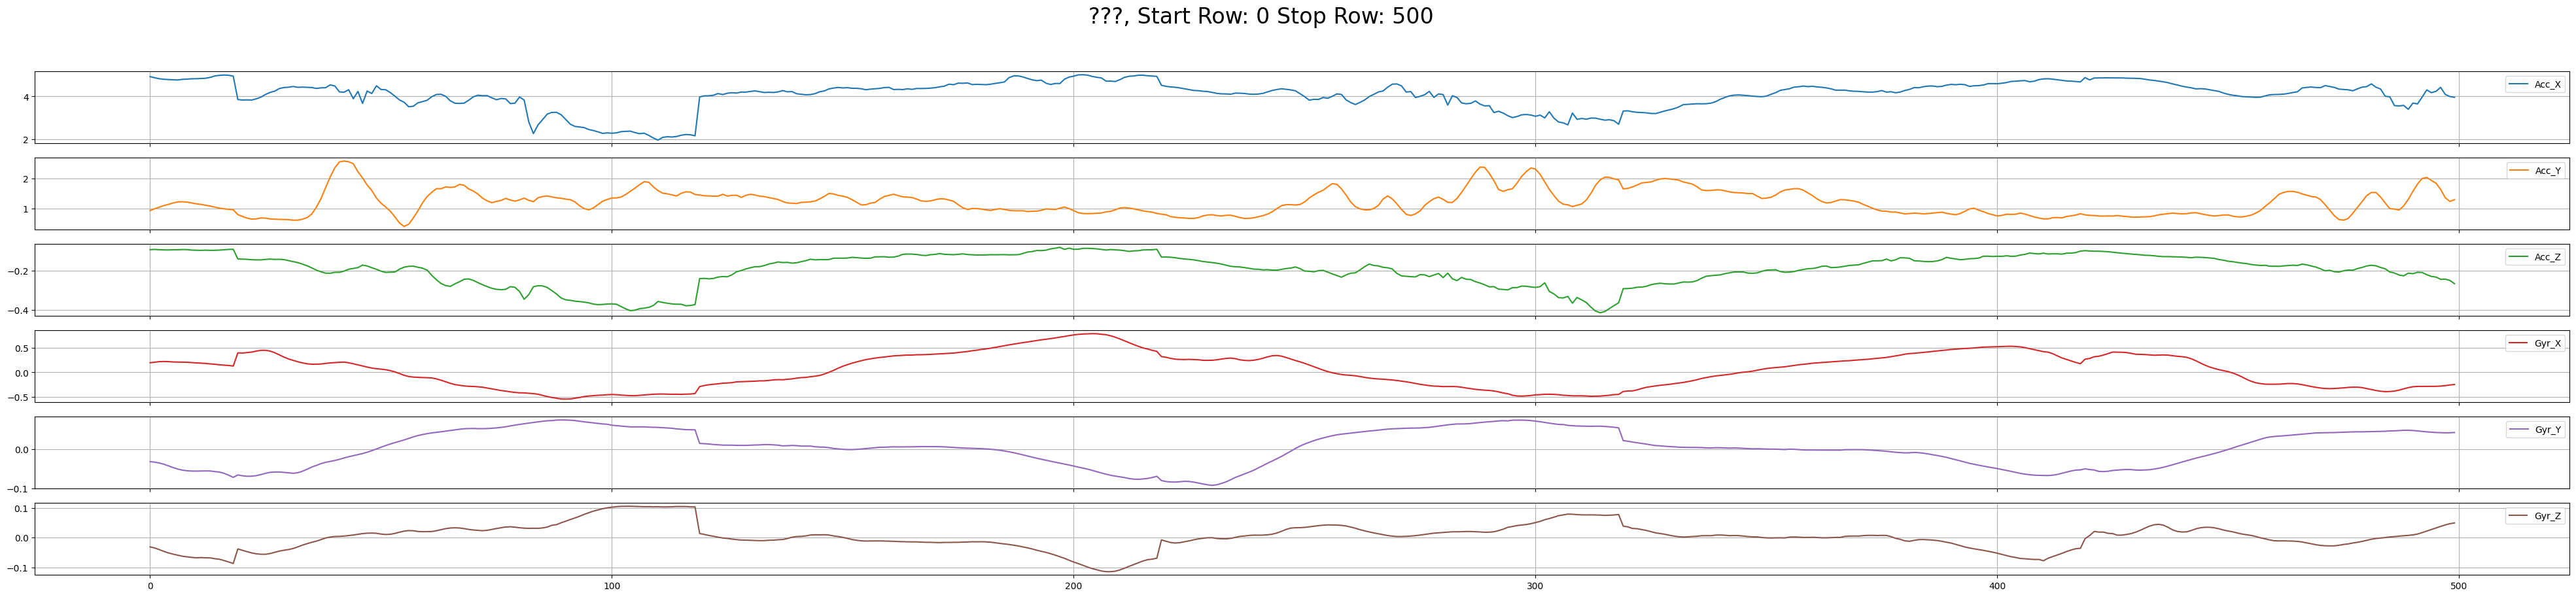

In [38]:
# Plot the data
plot_activity("???", df, start=0, stop=len(df))

In [33]:
start = time.time()
x['label'] = 'xxx'
a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
a = a.rename(columns={'Acc_X':'Acc_Xmean',
                        'Acc_Y':'Acc_Ymean',
                        'Acc_Z':'Acc_Zmean',
                        'Gyr_X':'Gyr_Xmean',
                        'Gyr_Y':'Gyr_Ymean',
                        'Gyr_Z':'Gyr_Zmean',})
b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
b = b.rename(columns={'Acc_X':'Acc_Xstd',
                        'Acc_Y':'Acc_Ystd',
                        'Acc_Z':'Acc_Zstd',
                        'Gyr_X':'Gyr_Xstd',
                        'Gyr_Y':'Gyr_Ystd',
                        'Gyr_Z':'Gyr_Zstd',
                        })
ab = a.join(b)
ab.reset_index(drop=True, inplace=True)
# Ensemble model
lgb_pred01 = Light01.predict(ab)
stop = time.time()
print(lgb_pred01)
print("Time:",stop-start,"s")

['C02']
Time: 0.010691404342651367 s
